___

![alt](pierian-data-logo.png)
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# K Means Color Quantization

### Imports


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

### The Image

In [4]:
image_as_array = mpimg.imread('../data/palm_trees.jpg')

In [5]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

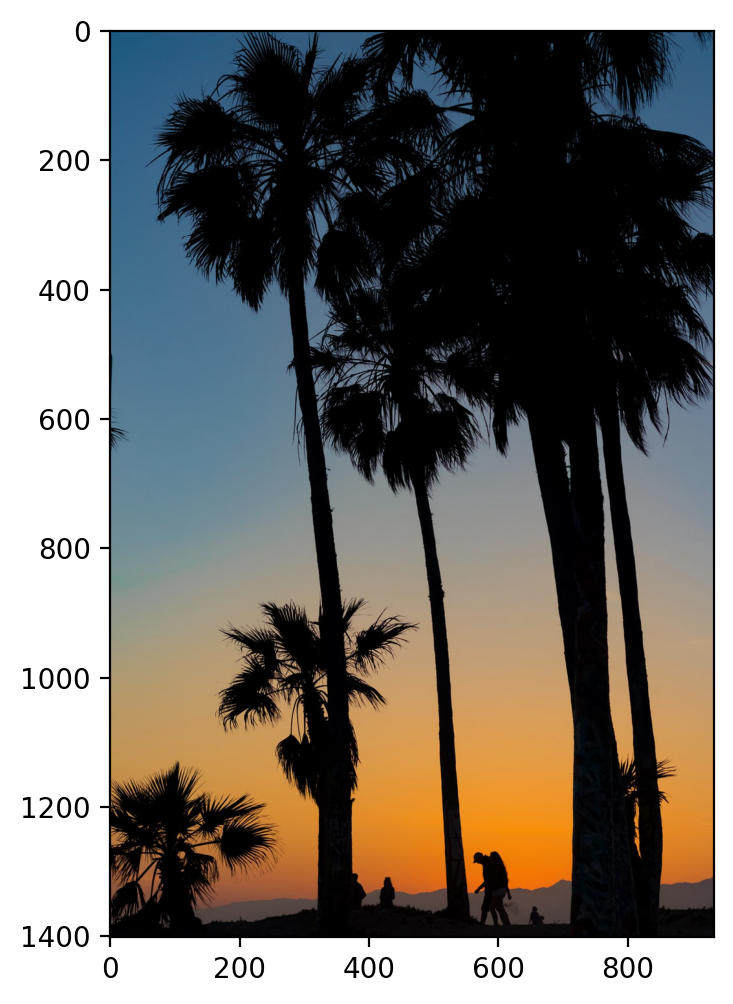

In [6]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [7]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [8]:
(h,w,c) = image_as_array.shape

In [9]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters=6)

In [12]:
model

KMeans(n_clusters=6)

In [13]:
labels = model.fit_predict(image_as_array2d)

In [14]:
labels

array([5, 5, 5, ..., 0, 0, 0], dtype=int32)

In [15]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[  2.7652353 ,   2.58392082,   3.70909184],
       [137.70533661, 144.0516417 , 143.72240368],
       [219.13593601, 135.28061545,  46.66292034],
       [ 67.40190529,  61.71513746,  62.21200566],
       [192.14604846, 154.5442021 , 108.9022674 ],
       [ 71.49537003, 109.58819627, 137.88326122]])

In [16]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [17]:
rgb_codes

array([[  3,   3,   4],
       [138, 144, 144],
       [219, 135,  47],
       [ 67,  62,  62],
       [192, 155, 109],
       [ 71, 110, 138]])

In [18]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [19]:
quantized_image

array([[[ 71, 110, 138],
        [ 71, 110, 138],
        [ 71, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 110, 138],
        [ 71, 110, 138]],

       [[ 71, 110, 138],
        [ 71, 110, 138],
        [ 71, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 110, 138],
        [ 71, 110, 138]],

       [[ 71, 110, 138],
        [ 71, 110, 138],
        [ 71, 110, 138],
        ...,
        [ 71, 110, 138],
        [ 71, 110, 138],
        [ 71, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

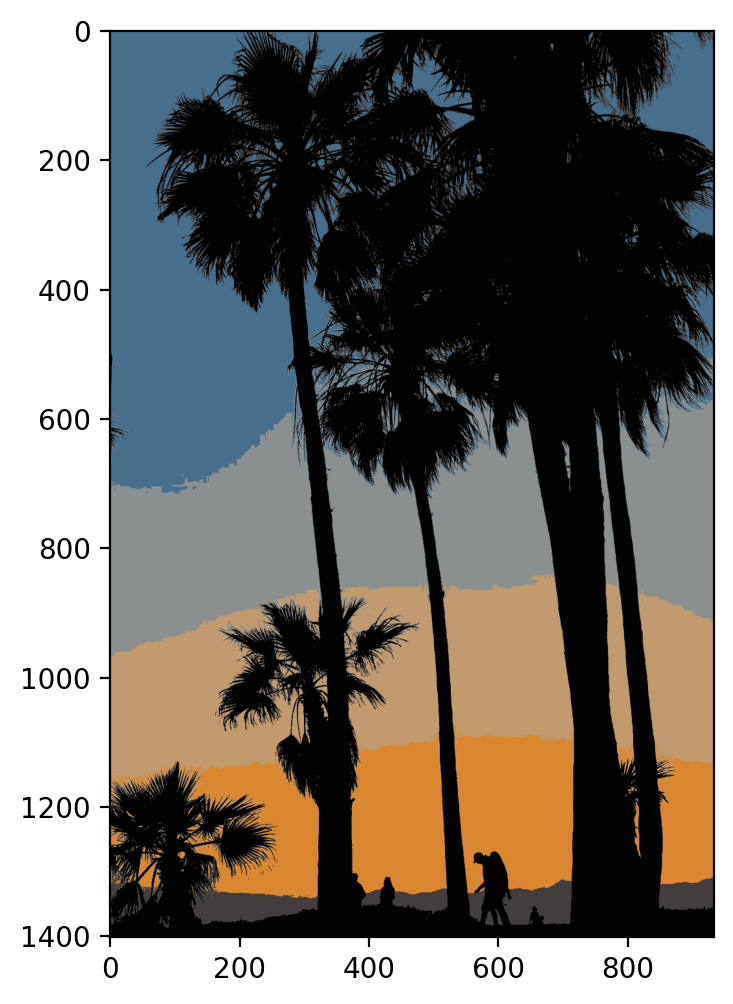

In [20]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)

----